## Imported the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix,precision_score,recall_score,f1_score,accuracy_score,classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
%matplotlib inline 
sns.set_style("darkgrid")

## Read the data as a data frame

In [2]:
data=pd.read_csv('Bank_Personal_Loan_Modelling.csv')

####  * read_csv is a function of pandas which is used to read the comma-separated values (csv)  into a DataFrame.

In [3]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


#### * head() is used to returns first n (i.e. n=5) rows of a DataFrame

In [4]:
data.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


#### * tail() is used to print the last n (i.e. n=5) rows of DataFrame

## EDA

### a. Shape of the data

In [5]:
data.shape

(5000, 14)

#### * shape prints the dimensional of a DataFrame in tuple type.

### b. Data type of each attribute

In [6]:
data.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

#### * dtypes prints  the datatype of each column in a  DataFrame.

### c. Checking the presence of missing values

In [7]:
data.isnull().values.any()

False

##### * "False" indicates that the DataFrame has no null values.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


#### * info() method prints the information about a DataFrame with the dtype , columns, non-null values and memory usage. From this method  we can check the presence of missing values in Non-Null Count. 

## Column description :

The column ID is unique for all rows and there is no association between a ID and Personal loan.

#### Binary category:

1. Personal Loan - Customer accept the personal loan or not. This is our target variable.
   0 => Not opted for personal loan.
   1 => Opted for person loan.
2. Credit Card - Whether the customer uses a credit card or not.
3. Online - Whether customer use internet banking facilitiesor not.
4. CD Account - Whether the customer have a certificate of deposit (CD) account with the bank or not.
5. Securities Account - Whether the customer have a securities account or not.

#### Interval variables:

1. Age - Age of the customer
2. Experience - Years of experience
3. Income - Annual income in dollars
4. CCAvg - Average credit card spending
5. Mortage - Value of House Mortgage

#### Ordinal Categorical Variables:

1. Family - Family size of the customer
2. Education - education level of the customer

#### Nominal variable :

1. ID
2. Zip Code

### d. Five point summary

In [9]:
data.describe().transpose()[['min','25%','50%','75%','max']]

,min,25%,50%,75%,max
ID,1.0,1250.75,2500.5,3750.25,5000.0
Age,23.0,35.00,45.0,55.00,67.0
Experience,-3.0,10.00,20.0,30.00,43.0
Income,8.0,39.00,64.0,98.00,224.0
ZIP Code,9307.0,91911.00,93437.0,94608.00,96651.0
Family,1.0,1.00,2.0,3.00,4.0
CCAvg,0.0,0.70,1.5,2.50,10.0
Education,1.0,1.00,2.0,3.00,3.0
Mortgage,0.0,0.00,0.0,101.00,635.0
Personal Loan,0.0,0.00,0.0,0.00,1.0


#### * data.describe() returns the 5 point summary along with count, mean and standard deviation.
#### * data.describe().transpose()[['m from five point summary5%','50%','75%','max']] returns only 5 point summary .
##### Intuition :  In five point summary, for the field experience  the minimum value is mentioned as -3.0. This states, in general it is not possible to measure negative years of experience. 
 

In [10]:
data[data['Experience'] < 0]['Experience'].count()

52

#### There are 52 records with negative experience. Before proceeding any further, we need to clean the negative data.

In [11]:
df_neg_exp=data[data['Experience']<0]
df_neg_exp

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


###### Intuition  : The customer who having some amount of income can't have experience as 0 or less than zero, it intuited they have incorrectly entered their experience with negative value.

In [12]:
data['Experience']=data['Experience'].apply(abs)

##### The above code description:

Obtain the value of Age & Education column from the record which has negative experience.
Filtered those records matching the criteria from the data which has experience greater than zero and take the median
Applied the median back to the location which had negative experience

## Data Distribution

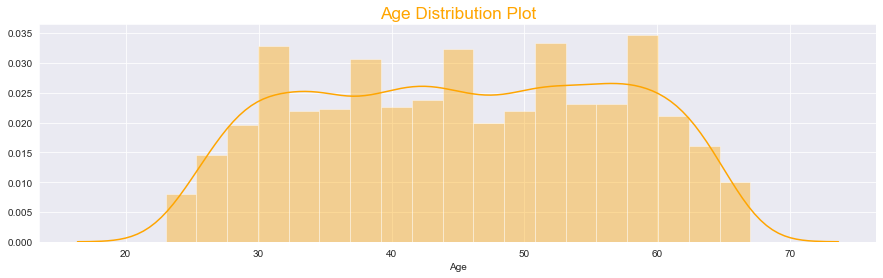

In [13]:
plt.figure(figsize=(15,4))
sns.distplot(data['Age'],color='Orange');
plt.title("Age Distribution Plot",color='Orange',fontsize='xx-large');

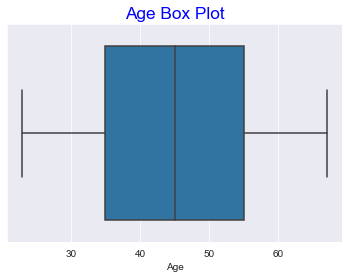

In [14]:
plt.title("Age Box Plot",color='blue',fontsize='xx-large');
sns.boxplot(data['Age']);

Age column has no outliers.

##### Observation: From Age distribution plot, we can infer that the customer falling between 30 years to 60 years and it is noramlly distributed.

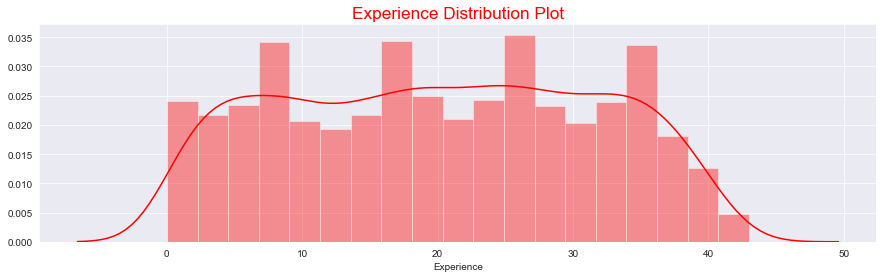

In [15]:
plt.figure(figsize=(15,4))
sns.distplot(data['Experience'],color='red');
plt.title("Experience Distribution Plot",color='red',fontsize='xx-large');

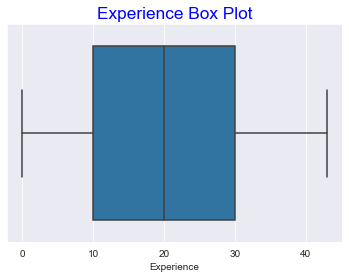

In [16]:
plt.title("Experience Box Plot",color='blue',fontsize='xx-large');
sns.boxplot(data['Experience']);

Experience column has no outliers.

##### Observation: From experience distribution plot, we can infer that the customer who has experience between 8 to 35 are falling.

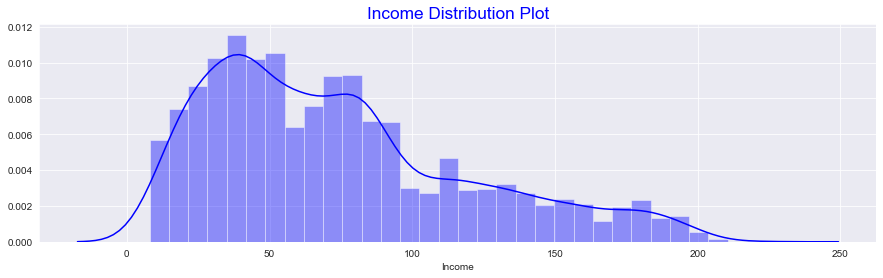

In [17]:
plt.figure(figsize=(15,4))
sns.distplot(data['Income'],color='blue');
plt.title("Income Distribution Plot",color='blue',fontsize='xx-large');

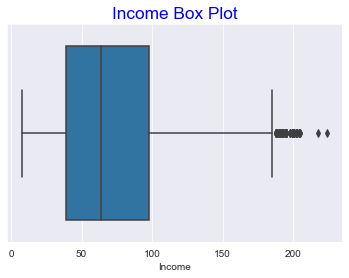

In [18]:
plt.title("Income Box Plot",color='blue',fontsize='xx-large');
sns.boxplot(data['Income']);

Income column has some outliers.

#####  Observation: From income distribution plot, we can infer that the majority of customer income between 40k to 50k and it clearly stating the skewness as right skewed.

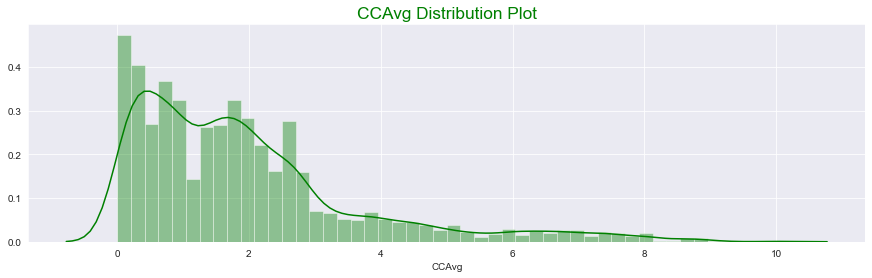

In [19]:
plt.figure(figsize=(15,4))
sns.distplot(data['CCAvg'],color='green');
plt.title("CCAvg Distribution Plot",color='green',fontsize='xx-large');

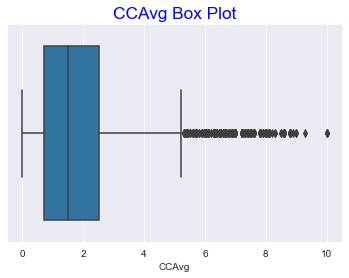

In [20]:
plt.title("CCAvg Box Plot",color='blue',fontsize='xx-large');
sns.boxplot(data['CCAvg']);

CCAvg column has more outliers.

##### Observation: From CCAvg distribution plot, we can infer that the average spending is between 0K to 10K and majority spends less than 2.5K . It clearly stating the skewness as right skewed.

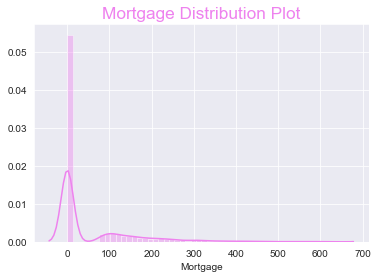

In [21]:
#plt.figure(figsize=(15,4))
sns.distplot(data['Mortgage'],color='violet');
plt.title("Mortgage Distribution Plot",color='violet',fontsize='xx-large');

##### Observation : From Mortgage plot, we can infer it is right skewed.

## Count plots

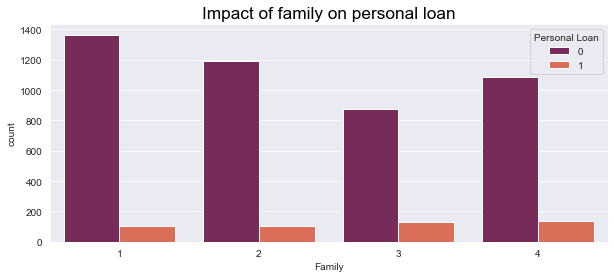

In [22]:
plt.figure(figsize=(10,4))
sns.countplot(data['Family'],hue=data['Personal Loan'],palette='rocket');
plt.title("Impact of family on personal loan",color='black',fontsize='xx-large');

##### Observation : The above count plot is for the column "Family". We can quickly visualize, Family with size of one is in larger count comparatively but it seems families with size of 3 and 4 are more likely to take loan. 

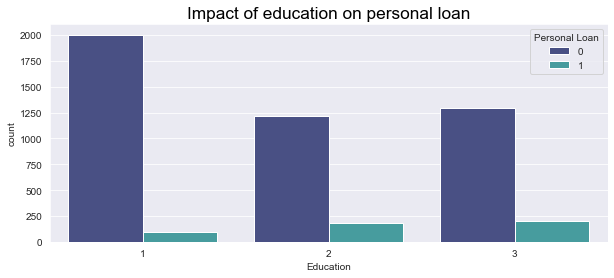

In [23]:
plt.figure(figsize=(10,4))
sns.countplot(data['Education'],hue=data['Personal Loan'],palette='mako');
plt.title("Impact of education on personal loan",color='black',fontsize='xx-large');

##### Observation : The above count plot is for the column "Education". Customers with education level of one is in larger count comparatively, but it seems customer with education level of three are more likely to take personal loan.

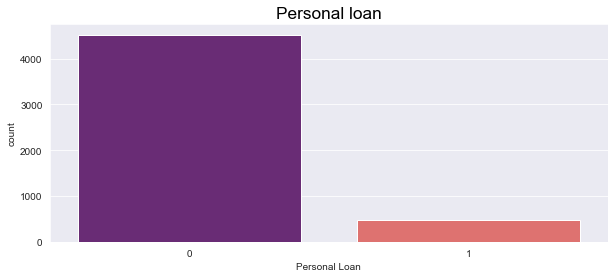

In [24]:
plt.figure(figsize=(10,4))
sns.countplot(data['Personal Loan'],palette='magma');
plt.title("Personal loan",color='black',fontsize='xx-large');

##### Observation: The above count plot is for the column "Personal Loan". It clearly states only few customers are intersted to take personal loans.

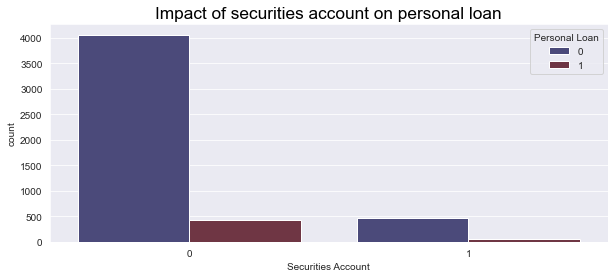

In [25]:
plt.figure(figsize=(10,4))
sns.countplot(data['Securities Account'],hue=data['Personal Loan'],palette='icefire');
plt.title("Impact of securities account on personal loan",color='black',fontsize='xx-large');

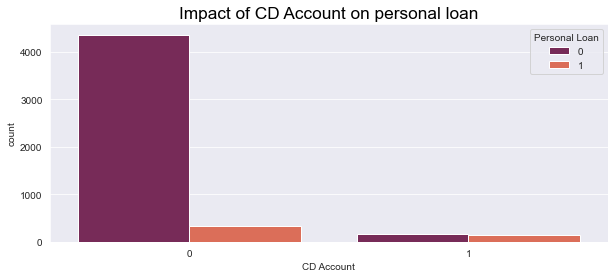

In [26]:
plt.figure(figsize=(10,4))
sns.countplot(data['CD Account'],hue=data['Personal Loan'],palette='rocket');
plt.title("Impact of CD Account on personal loan",color='black',fontsize='xx-large');

##### Observation : Customers who does not have CD account , does not have loan as well. This seems to be majority. But almost all customers who has CD account has loan as well

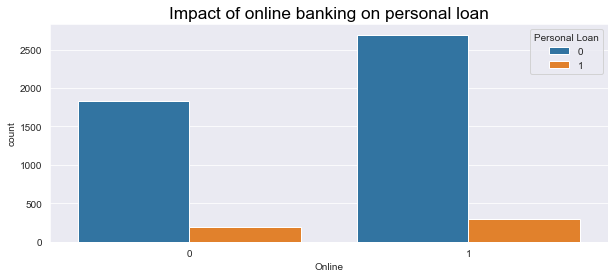

In [27]:
plt.figure(figsize=(10,4))
sns.countplot(data['Online'],hue=data['Personal Loan']);
plt.title("Impact of online banking on personal loan",color='black',fontsize='xx-large');

##### Observation : Customers who use internet banking facilities are more likely to get personal loan.


#### Correlation plot

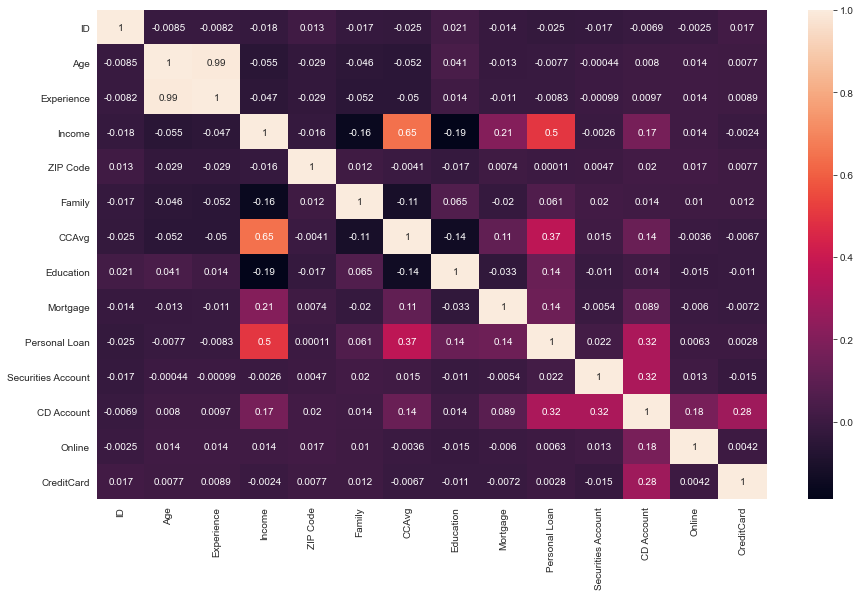

In [28]:
plt.figure(figsize=(15,9))
sns.heatmap(data.corr(),annot=True);

##### Observation: Income & CCAvg is moderately correlated , Age & Experience features are highly correlated, 0.99.

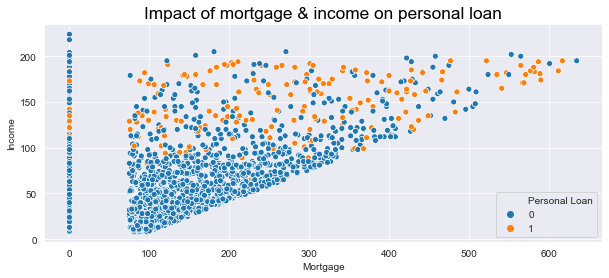

In [29]:
plt.figure(figsize=(10,4))
sns.scatterplot(data['Mortgage'],data['Income'],hue=data['Personal Loan']);
plt.title("Impact of mortgage & income on personal loan",color='black',fontsize='xx-large');

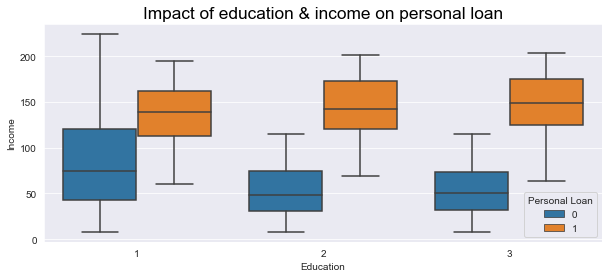

In [30]:
plt.figure(figsize=(10,4))
sns.boxplot(data['Education'],data['Income'],hue=data['Personal Loan']);
plt.title("Impact of education & income on personal loan",color='black',fontsize='xx-large');

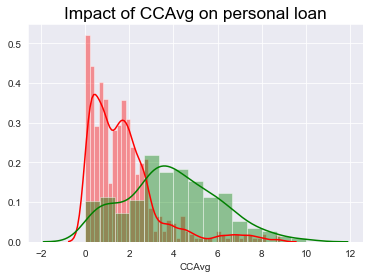

In [31]:
sns.distplot( data[data['Personal Loan'] == 0]['CCAvg'], color = 'r')
sns.distplot( data[data['Personal Loan'] == 1]['CCAvg'], color = 'g');
plt.title("Impact of CCAvg on personal loan",color='black',fontsize='xx-large');

##### Observation: The graph show persons who have personal loan have a higher credit card average. Average credit card spending with a median of 3800 dollar indicates a higher probability of personal loan. Lower credit card spending with a median of 1400 dollars is less likely to take a loan. This could be useful information.

## Feature Selection

In [32]:
X=data.drop(['Personal Loan','ID','Experience'],axis=1)
y=data['Personal Loan']

###### The feature selection is made for both independent(X) and dependent(y) variables. For independent variable, the column "ID" (because of unique digits) , dependent variables ("Personal Loan") and experience features are excluded. It is intuitively understandable that experience increases as age increases. Correlated features degrade the learning performance and causes instability on the models.  is excluded.

## Splitting dataset in to train and test dataset

In [33]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)

#### Standarization of train data & test data

In [34]:
normalized_x_train = pd.DataFrame(StandardScaler().fit_transform(x_train), columns = x_train.columns)
normalized_x_test = pd.DataFrame(StandardScaler().fit_transform(x_test), columns = x_test.columns)

Due to data leakage problem, the scaling take place after train test split.
Here, instead of scaling all data, individual parameters are scaled.

## Building Model


## * Logistics Regression

###### (1) Building model

In [35]:
logistics=LogisticRegression()

In [36]:
logistics.fit(normalized_x_train,y_train)

LogisticRegression()

##### The above fit function is used to train a model  with training data

In [37]:
print("The training score for logistics model is",logistics.score(normalized_x_train,y_train))

The training score for logistics model is 0.9537142857142857


In [38]:
y_predict=logistics.predict(normalized_x_test)

##### Predict() function is used to predict the y value with testing data (x-value)

In [39]:
print("The Accuracy score for logistics model is",logistics.score(normalized_x_test,y_test))

The Accuracy score for logistics model is 0.9486666666666667


###### (2) Confusion matrix for  logistics model

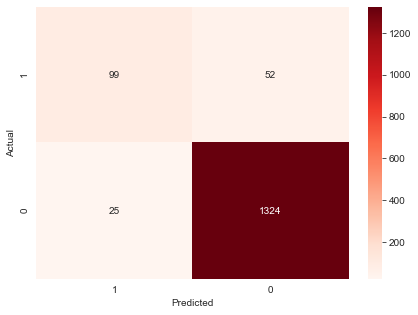

In [40]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0]);

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["1","0"]])
#plt.title("Confusion matrix for Logistics Model", fontsize =10)
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g',cmap='Reds');
plt.xlabel("Predicted");
plt.ylabel("Actual");

#### Observation:

<p> The above confusion matrix states that model predicts </p>
<p>99 liability customer are likely for buying personal loan & it is true (TP), </p>
<p>1324 liability customer are not interested for buying personal loan & it is true(TN), </p>
<p>25 liability customer are likely for buying personal loan & it is false (FP) ,</p>
<p>52 liability customer are not interested for buying personal loan & it is false(FN) </p>

###### (3)  Precision & Recall

In [41]:
_precision = precision_score(y_test, y_predict)
print("The Precision of logistics model",_precision)
recall=recall_score(y_test,y_predict)
print("The Recall of logistics model",recall)
flscore=f1_score(y_test,y_predict)
print("The F1 score value for logistics is:",flscore)

The Precision of logistics model 0.7983870967741935
The Recall of logistics model 0.6556291390728477
The F1 score value for logistics is: 0.72


##### (4) Report

In [42]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1349
           1       0.80      0.66      0.72       151

    accuracy                           0.95      1500
   macro avg       0.88      0.82      0.85      1500
weighted avg       0.95      0.95      0.95      1500



Though accuracy score is good, precision score is in the range of acceptable.

## * Naive Bayes Algorithm

###### (1) Building model

In [43]:
bayes=GaussianNB()

In [44]:
bayes.fit(normalized_x_train,y_train)

GaussianNB()

In [45]:
bayes.score(normalized_x_train,y_train)

0.8828571428571429

In [46]:
bayes.fit(normalized_x_test,y_test)

GaussianNB()

In [47]:
print("The Accuracy score for logistics model is",bayes.score(normalized_x_test,y_test))

The Accuracy score for logistics model is 0.8846666666666667


In [48]:
y_bayes_predict=bayes.predict(normalized_x_test)

In [49]:
Probablity=bayes.predict_proba(normalized_x_test)
Probablity

array([[9.19810073e-01, 8.01899274e-02],
       [9.96274766e-01, 3.72523404e-03],
       [9.98734637e-01, 1.26536343e-03],
       ...,
       [3.59207993e-02, 9.64079201e-01],
       [9.96439694e-02, 9.00356031e-01],
       [9.99994301e-01, 5.69905334e-06]])

###### (2) Confusion matrix

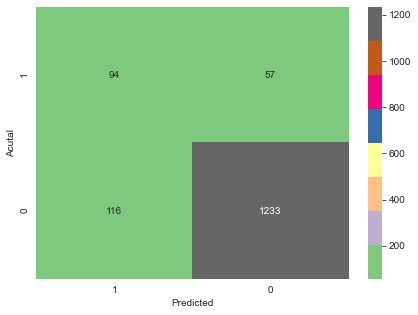

In [50]:
cm=metrics.confusion_matrix(y_test, y_bayes_predict, labels=[1, 0]);

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["1","0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g',cmap=plt.cm.Accent);
plt.xlabel("Predicted");
plt.ylabel("Acutal");

#### Observation:

<p>The above confusion matrix states, model has predicted as</p>
<p>95 liability customer are likely for buying personal loan & it is true (TP),</p> 
<p>1233 liability customer are not interested for buying personal loan & it is true(TN), </p>
<p>116 liability customer are likely for buying personal loan & it is false (FP), </p>
<p>56 liability customer are not interested for buying personal loan & it is false(FN)</p>

###### (3) Precision & Recall

In [51]:
bayes_precision =precision_score(y_test, y_bayes_predict)
print("The Precision for bayes algorithm model is",bayes_precision)
bayes_recall=recall_score(y_test,y_bayes_predict)
print("The Recall for bayes algorithm model is",bayes_recall)
fl_b_score=f1_score(y_test,y_bayes_predict)
print("The F1 score value for logistics is:",fl_b_score)

The Precision for bayes algorithm model is 0.44761904761904764
The Recall for bayes algorithm model is 0.6225165562913907
The F1 score value for logistics is: 0.520775623268698


However accuracy score is good, precision score is in low range.

##### (4) Calculate cross validation score

In [52]:
cross_val_predict(GaussianNB(),normalized_x_train,y_train,cv=5)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

##### (5) Report

In [53]:
print(classification_report(y_test, y_bayes_predict))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1349
           1       0.45      0.62      0.52       151

    accuracy                           0.88      1500
   macro avg       0.70      0.77      0.73      1500
weighted avg       0.90      0.88      0.89      1500



## * KNN Model

##### (1) Building model

In [54]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(normalized_x_train,y_train)
print("Train accuracy for KNN  : ",knn.score(normalized_x_train,y_train))
print("Test accuracy for KNN : ",knn.score(normalized_x_test,y_test))
y_knn3_predict=knn.predict(normalized_x_test)
print("Accuracy score for KNN : ",accuracy_score(y_test,y_knn3_predict))

Train accuracy for KNN  :  0.9765714285714285
Test accuracy for KNN :  0.9613333333333334
Accuracy score for KNN :  0.9613333333333334


In [55]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(normalized_x_train,y_train)
print("Train accuracy : ",knn.score(normalized_x_train,y_train))
print("Test accuracy : ",knn.score(normalized_x_test,y_test))
y_knn5_predict=knn.predict(normalized_x_test)
print("Accuracy score : ",accuracy_score(y_test,y_knn5_predict))

Train accuracy :  0.97
Test accuracy :  0.958
Accuracy score :  0.958


In [56]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(normalized_x_train,y_train)
print("Train accuracy : ",knn.score(normalized_x_train,y_train))
print("Test accuracy : ",knn.score(normalized_x_test,y_test))
y_knn9_predict=knn.predict(normalized_x_test)
print("Accuracy score : ",accuracy_score(y_test,y_knn9_predict))

Train accuracy :  0.9611428571428572
Test accuracy :  0.9506666666666667
Accuracy score :  0.9506666666666667


##### (2) Finding optimum K value

In [57]:
k_list=list(range(1,20))
neighbors=list(filter(lambda x:x%2!=0,k_list))

In [58]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(normalized_x_train, y_train)
    # predict the response
    y_pred = knn.predict(normalized_x_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors in KNN is %d" % optimal_k)

The optimal number of neighbors in KNN is 3


##### (3) Confusion matrix

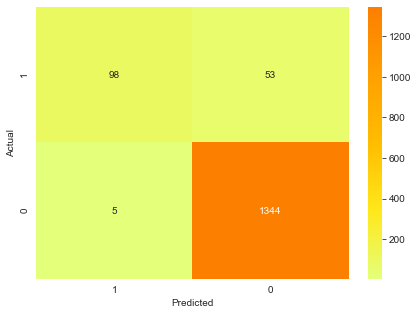

In [59]:
cm=metrics.confusion_matrix(y_test, y_knn3_predict, labels=[1, 0]);

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["1","0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g',cmap=plt.cm.Wistia);
plt.xlabel("Predicted");
plt.ylabel("Actual");

#### Observation:

<p>The above confusion matrix states, model has predicted as</p>
<p>94 liability customer are likely for buying personal loan & it is true (TP), </p>
<p>1344 liability customer are not interested for buying personal loan & it is true(TN), </p>
<p>5 liability customer are likely for buying personal loan & it is false (FP), </p>
<p>57 liability customer are not interested for buying personal loan & it is false(FN) </p>

###### (4) Precision & Recall

In [60]:
knn_precision =precision_score(y_test, y_knn3_predict)
print("The precision value for KNN is:",knn_precision)
knn_recall=recall_score(y_test,y_knn3_predict)
print("The Recall value for KNN is:",knn_recall)
flscore=f1_score(y_test,y_knn3_predict)
print("The F1 score value for KNN is:",flscore)

The precision value for KNN is: 0.9514563106796117
The Recall value for KNN is: 0.6490066225165563
The F1 score value for KNN is: 0.7716535433070867


##### (5) Report

In [61]:
print(classification_report(y_test, y_knn3_predict))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1349
           1       0.95      0.65      0.77       151

    accuracy                           0.96      1500
   macro avg       0.96      0.82      0.88      1500
weighted avg       0.96      0.96      0.96      1500



##### However accuracy score is good, precision score is in good range.

# Evaluation

F1-Score :Logistic Model: mean:0.710851, standard deviation:0.062882
Precison :Logistic Model: mean:0.824039, standard deviation:0.071351
Recall :Logistic Model: mean:0.629167, standard deviation:0.075000
_________________________________________________________________________________________
F1-Score :KNeighborsClassifier Model: mean:0.728075, standard deviation:0.054818
Precison :KNeighborsClassifier Model: mean:0.883116, standard deviation:0.083135
Recall :KNeighborsClassifier Model: mean:0.623958, standard deviation:0.064035
_________________________________________________________________________________________
F1-Score :GaussianNB Model: mean:0.647204, standard deviation:0.127126
Precison :GaussianNB Model: mean:0.728701, standard deviation:0.230209
Recall :GaussianNB Model: mean:0.608333, standard deviation:0.073243
_________________________________________________________________________________________


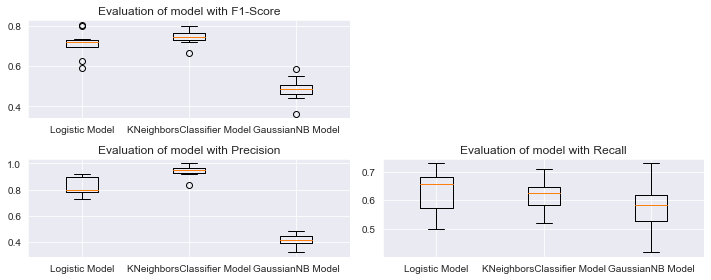

In [62]:
X_scaled=pd.DataFrame(StandardScaler().fit_transform(X), columns = X.columns)
def get_models():
    models = list()
    models.append(('Logistic Model',LogisticRegression()))
    models.append(('KNeighborsClassifier Model',KNeighborsClassifier()))
    models.append(('GaussianNB Model',GaussianNB()))
    return models
# evaluate the model using a given test condition
def evaluate_model(cv, model,scoring):
    scores = cross_val_score(model, X_scaled, y, scoring=scoring, cv=cv, n_jobs=-1)
    return scores
 
# define test conditions
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
models = get_models()
results_f1 = list()
results_precision = list()
results_recall = list()
modelname=list()
# evaluate each model
for name,model in models:
    modelname.append(name)
    results_f1.append(evaluate_model(cv, model,'f1'))
    results_precision.append(evaluate_model(cv, model,'precision'))
    results_recall.append(evaluate_model(cv, model,'recall'))
    lst_f1=np.array(results_f1)
    lst_p=np.array(results_precision)
    lst_r=np.array(results_recall)
    print("F1-Score :%s: mean:%f, standard deviation:%f" % (name, lst_f1.mean(), lst_f1.std()))
    print("Precison :%s: mean:%f, standard deviation:%f" % (name, lst_p.mean(), lst_p.std()))
    print("Recall :%s: mean:%f, standard deviation:%f" % (name, lst_r.mean(), lst_r.std()))
    print("_________________________________________________________________________________________")

#Ploting f1-score
plt.figure(figsize=(10,4))
plt.subplot(2,2,1);
plt.title('Evaluation of model with F1-Score')
plt.boxplot(results_f1,labels=modelname)


#Ploting precision
plt.subplot(2,2,3);
plt.title('Evaluation of model with Precision')
plt.boxplot(results_precision,labels=modelname)

#Ploting recall
plt.subplot(2,2,4);
plt.title('Evaluation of model with Recall')
plt.boxplot(results_recall,labels=modelname)

plt.tight_layout()
plt.show()

Cross validation is used to compare and select the effective model for the given problem. Here, most popular K-fold cross validation method is used. The results clearly states, knn has effectively satisfied the problem statement by predicting the opted and not opted counts for personal loan.

## Best Model

The target of the bank is to convert there liability customers into loan customers.
For this study, three classification algorithms were used. 
From the above graphs of precision,recall and f1-score, it seems k-nearest neighbors algorithm have the highest precison and f1-score comparatively and we can choose that as our final model as KNN.